In [79]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# Global settings
dataset_dir = 'dataset'  # Update with your actual path
image_size = (32, 32)  # Update to desired resolution

In [80]:
def load_images_cv2(dataset_dir, image_size=(32, 32)):
    images = []
    labels = []
    categories = os.listdir(dataset_dir)
    for category in categories:
        category_path = os.path.join(dataset_dir, category)
        if os.path.isdir(category_path):
            for file_name in os.listdir(category_path):
                img_path = os.path.join(category_path, file_name)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, image_size)
                    images.append(img)
                    labels.append(category)  # Add the category label
    return np.array(images), np.array(labels)

# Load images and labels
images_array, labels_array = load_images_cv2(dataset_dir, image_size=(32, 32))
print(f"Loaded {images_array.shape[0]} images with labels {set(labels_array)}")



Loaded 25 images with labels {np.str_('dogs'), np.str_('frogs'), np.str_('cats'), np.str_('apples'), np.str_('cars')}


In [81]:
def PlotSample(index):
    plt.imshow(cv2.cvtColor(images_array[index], cv2.COLOR_BGR2RGB))
    plt.title(f"Sample {index} - Label: {labels_array[index]}")
    plt.axis('off')
    plt.show()

# Test the function
# i=0
# while i<25:
#     PlotSample(i)
#     i=i+1

# Flattening the image

In [82]:
flattened_images = images_array.reshape(images_array.shape[0], -1)
print(f"Flattened images shape: {flattened_images.shape}")

Flattened images shape: (25, 3072)


# Visualize data and calculate covariance

Covariance matrix:
 [[8599.5904 7665.2992 7924.2208 ... 6270.1392 4869.6    5155.8768]
 [7665.2992 7385.8816 7578.0784 ... 5736.3216 4835.24   4924.8864]
 [7924.2208 7578.0784 7985.5616 ... 6027.7584 5005.32   5249.8336]
 ...
 [6270.1392 5736.3216 6027.7584 ... 7304.6016 6189.     6219.6064]
 [4869.6    4835.24   5005.32   ... 6189.     5907.92   5781.    ]
 [5155.8768 4924.8864 5249.8336 ... 6219.6064 5781.     5919.2256]]
Flattened images shape: (25, 3072)
Covariance matrix:
 [[6719.06183743 5440.2976054  4597.64126591]
 [5440.2976054  5395.72627765 4604.59405413]
 [4597.64126591 4604.59405413 5338.31923223]]
Flattened images shape: (25600, 3)


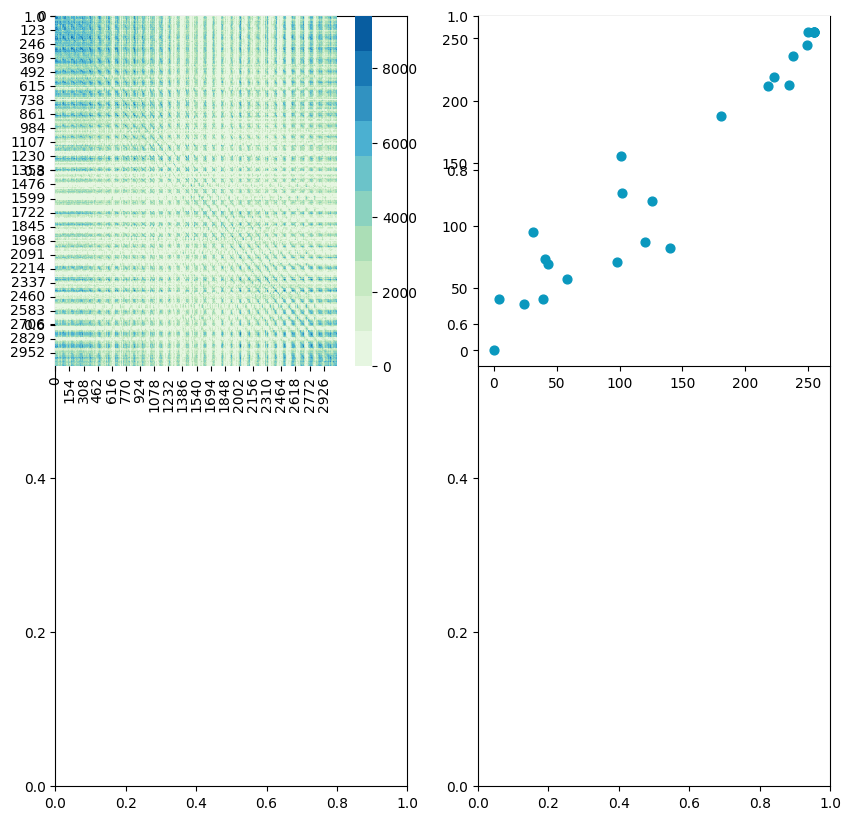

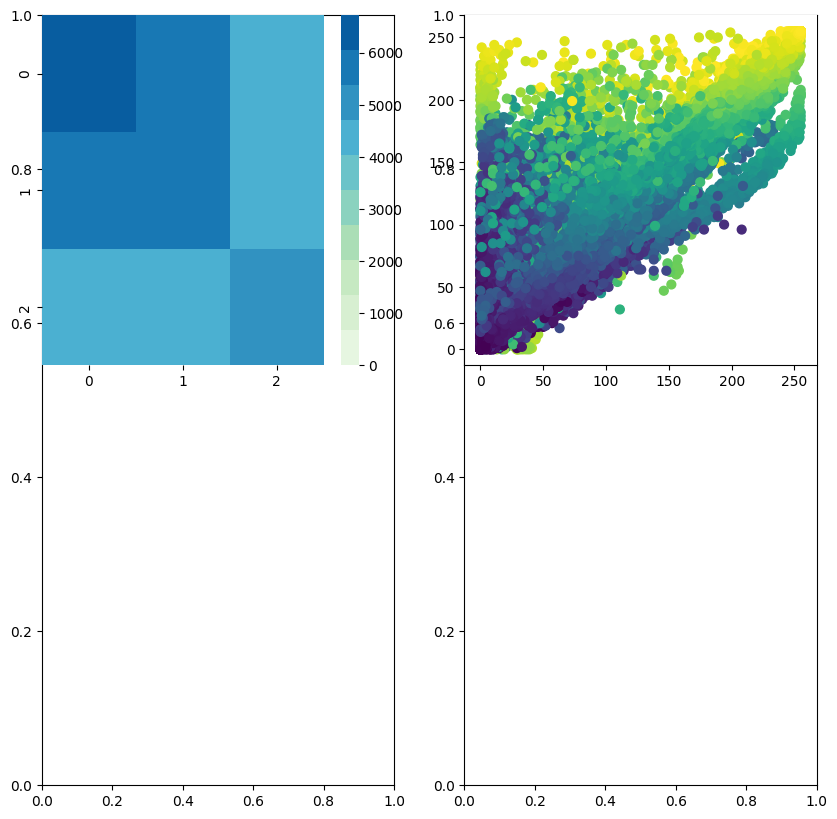

In [83]:
import seaborn as sns

def plotDataAndCov(data):
    ACov = np.cov(data, rowvar=False, bias=True)
    print('Covariance matrix:\n', ACov)

    fig, ax = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(10, 10)

    ax0 = plt.subplot(2, 2, 1)

    # Choosing the colors
    cmap = sns.color_palette("GnBu", 10)
    sns.heatmap(ACov, cmap=cmap, vmin=0)

    ax1 = plt.subplot(2, 2, 2)

    # data can include the colors
    if data.shape[1]==3:
        c=data[:,2]
    else:
        c="#0A98BE"
    ax1.scatter(data[:,0], data[:,1], c=c, s=40)

    # Remove the top and right axes from the data plot
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)


# Call with flattened_images
plotDataAndCov(flattened_images)
print(f"Flattened images shape: {flattened_images.shape}")

plotDataAndCov(images_array.reshape(-1,3))
print(f"Flattened images shape: {images_array.reshape(-1,3).shape}")